# Setup cell

In [1]:
# Setup cell
import os

from dotenv import load_dotenv
import pandas as pd
import logging
from metrics import Metrics
from platforms import Platforms
import github
import gitea_forgejo
import gitlab
import platform_analysis

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load environment variables from .env file
load_dotenv()

# Load tokens from environment variables
GITHUB_TOKEN = os.getenv("GITHUB_TOKEN")
GITLAB_TOKEN = os.getenv("GITLAB_TOKEN")
GITEA_TOKEN = os.getenv("GITEA_TOKEN")
FORGEJO_TOKEN = os.getenv("FORGEJO_TOKEN")
BITBUCKET_TOKEN = os.getenv("BITBUCKET_TOKEN")

# Set up headers for API requests
GITHUB_HEADERS = {"Authorization": f"token {GITHUB_TOKEN}"}
GITEA_HEADERS = {"Authorization": f"token {GITEA_TOKEN}"}
FORGEJO_HEADERS = {"Authorization": f"token {FORGEJO_TOKEN}"}
GITLAB_HEADERS = {"Authorization": f"Bearer {GITLAB_TOKEN}"}
BITBUCKET_HEADERS = {"Authorization": f"Bearer {BITBUCKET_TOKEN}"}

# Initialize platform instances
github_instance = github.GitHub(GITHUB_HEADERS)
gitea_instance = gitea_forgejo.GiteaForgejo(GITEA_HEADERS)
forgejo_instance = gitea_forgejo.GiteaForgejo(FORGEJO_HEADERS)
gitlab_instance = gitlab.Gitlab(GITLAB_HEADERS)

INFO:WDM:====== WebDriver manager ======
INFO:WDM:Get LATEST chromedriver version for google-chrome
INFO:WDM:Get LATEST chromedriver version for google-chrome
INFO:WDM:Driver [/Users/sam/.wdm/drivers/chromedriver/mac64/133.0.6943.126/chromedriver-mac-arm64/chromedriver] found in cache


# Fetching Repositories from Github

In [4]:
# Fetch a given number of pages of 100 Github repositories
data = github_instance.fetch_repositories(2)
file_name = "github_repositories_test.csv"

# Save the gathered data to a CSV file
if data:
    df = pd.DataFrame(data)
    df.to_csv(file_name, index=False)
    logger.info(f"Saved repositories to '{file_name}'.")
else:
    logger.error("No repositories were fetched.")

INFO:base_platform:Fetching page 1...
INFO:__main__:Saved 1,000 repositories to 'github_repositories.csv'.


In [2]:
input_file = "github_repositories_test.csv"
output_file = "github_repos_with_metrics_test.csv"

# Load the csv file that contains the repositories
df = pd.read_csv(input_file)

# Add chosen metric for each repository of the DataFrame
github_instance.add_metric(df, Platforms.GITHUB, Metrics.ISSUE)
github_instance.add_metric(df, Platforms.GITHUB, Metrics.COMMIT)
github_instance.add_metric(df, Platforms.GITHUB, Metrics.BRANCH)
github_instance.add_metric(df, Platforms.GITHUB, Metrics.PULL_REQUEST)
github_instance.add_metric(df, Platforms.GITHUB, Metrics.CONTRIBUTOR)


# Save updated CSV
df.to_csv(output_file, index=False)
logger.info(f"Done! Updated file saved as {output_file}")

INFO:base_platform:Fetching data for Vandana-Chouhan/InventoryIT...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for aakash005b/skill-introduction-to-github...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for sreyachitluru/DAV_Story_Telling...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for pamitra/research...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for Targter/AIPOWERED_CODE_REVIEWER...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for fabiomazz/lovable...
INF

# Fetching Repositories from Gitea

In [3]:
# Fetch a given number of pages of 50 Gitea repositories
data = gitea_instance.fetch_repositories(3, Platforms.GITEA)
file_name = "gitea_repositories_test.csv"

# Save the gathered data to a CSV file
if data:
    df = pd.DataFrame(data)
    df.to_csv(file_name, index=False)
    logger.info(f"Saved repositories to '{file_name}'.")
else:
    logger.error("No repositories were fetched.")

INFO:base_platform:Fetching page 1...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching page 2...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:__main__:Saved repositories to 'gitea_repositories_test.csv'.


In [2]:
input_file = "gitea_repositories_test.csv"
output_file = "gitea_repos_with_metrics_test.csv"

# Load the csv file that contains the repositories
df = pd.read_csv(input_file)

# Add chosen metric for each repository of the DataFrame
gitea_instance.add_metric(df, Platforms.GITEA, Metrics.ISSUE)
gitea_instance.add_metric(df, Platforms.GITEA, Metrics.COMMIT)
gitea_instance.add_metric(df, Platforms.GITEA, Metrics.BRANCH)
gitea_instance.add_metric(df, Platforms.GITEA, Metrics.PULL_REQUEST)
gitea_instance.add_contributors(df, Platforms.GITEA)

# Save updated CSV
df.to_csv(output_file, index=False)
logger.info(f"Done! Updated file saved as {output_file}")

INFO:base_platform:Fetching data for ProjectJBS/JBS-Client...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for ARSC/ARSC_Devices...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for Jaxploit/Temp...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for gentle/ppcat...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
ERROR:base_platform:Error fetching https://gitea.com/api/v1/repos/gentle/ppcat/issues?state=all&limit=1: not found (404)
ERROR:base_platform:Error fetching gentle/ppcat: 404
INFO:base_platform:Fetching data for mc36/freeRtr...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_wi

# Fetching Repositories from Forgejo

In [3]:
# Fetch a given number of pages of 50 Forgejo repositories
data = forgejo_instance.fetch_repositories(3, Platforms.FORGEJO)
file_name = "forgejo_repositories_test.csv"

# Save the gathered data to a CSV file
if data:
    df = pd.DataFrame(data)
    df.to_csv(file_name, index=False)
    logger.info(f"Saved repositories to '{file_name}'.")
else:
    logger.error("No repositories were fetched.")

INFO:base_platform:Fetching page 1...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching page 2...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:__main__:Saved repositories to 'forgejo_repositories_test.csv'.


In [4]:
input_file = "forgejo_repositories_test.csv"
output_file = "forgejo_repos_with_metrics_test.csv"

# Load the csv file that contains the repositories
df = pd.read_csv(input_file)

# Add chosen metric for each repository of the DataFrame
forgejo_instance.add_metric(df, Platforms.FORGEJO, Metrics.ISSUE)
forgejo_instance.add_metric(df, Platforms.FORGEJO, Metrics.COMMIT)
forgejo_instance.add_metric(df, Platforms.FORGEJO, Metrics.BRANCH)
forgejo_instance.add_metric(df, Platforms.FORGEJO, Metrics.PULL_REQUEST)
forgejo_instance.add_contributors(df, Platforms.FORGEJO)

# Save updated CSV
df.to_csv(output_file, index=False)
logger.info(f"Done! Updated file saved as {output_file}")

INFO:base_platform:Fetching data for forgejo/forgejo...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for Skadi_the_Wolf/abelian-sandpiles...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for malenka/grid...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for helge/cattle_grid...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:base_platform:Fetching data for FreeBSD/freebsd-ports...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
ERROR:base_platform:Error fetching https://codeberg.org/api/v1/repos/FreeBSD/freebsd-ports/issues?state=all&

# Fetching Repositories from Gitlab

In [5]:
# Fetch a given number of pages of 100 Gitlab repositories
data = gitlab_instance.fetch_repositories(2)
file_name = "gitlab_repositories_test.csv"

# Save the gathered data to a CSV file
if data:
    df = pd.DataFrame(data)
    df.to_csv(file_name, index=False)
    logger.info(f"Saved repositories to '{file_name}'.")
else:
    logger.error("No repositories were fetched.")

INFO:base_platform:Fetching page 1...
INFO:base_platform:Starting call to 'base_platform.BasePlatform.request_with_retry', this is the 1st time calling it.
INFO:__main__:Saved repositories to 'gitlab_repositories_test.csv'.


In [3]:
input_file = "gitlab_repositories_test.csv"
output_file = "gitlab_repos_with_metrics_test.csv"

# Load the csv file that contains the repositories
df = pd.read_csv(input_file)

# Add chosen metric for each repository of the DataFrame
gitlab_instance.add_metric(df, Metrics.ISSUE)
gitlab_instance.add_metric(df, Metrics.COMMIT)
gitlab_instance.add_metric(df, Metrics.CONTRIBUTOR)
gitlab_instance.add_metric(df, Metrics.PULL_REQUEST)
gitlab_instance.add_metric(df, Metrics.LANGUAGE)
gitlab_instance.add_metric(df, Metrics.LICENSE)

# Save updated CSV
df.to_csv(output_file, index=False)
logger.info(f"Done! Updated file saved as {output_file}")

INFO:base_platform:Fetching data for TadiT7/android_platform_superproject...
INFO:base_platform:Fetching data for wpm/hexapawn...
INFO:base_platform:Fetching data for irregularverbs/irregularverbsapiapp...
INFO:base_platform:Fetching data for arise-biodiversity/biocloud/core/biocloud-core...
INFO:base_platform:Fetching data for FreeBSD/freebsd-src...
INFO:base_platform:Fetching data for elxr/tools/pasha...
INFO:base_platform:Fetching data for xiaoxiong-T/stardustexplorer...
INFO:base_platform:Fetching data for marrrx/tienda...
INFO:base_platform:Fetching data for gitlab-org/security-products/analyzers/gemnasium...
INFO:base_platform:Fetching data for x86-glibc/glibc...
INFO:base_platform:Fetching data for openid/conformance-suite...
INFO:base_platform:Fetching data for apollo-lhc/FW/SM_ZYNQ_FW...
INFO:base_platform:Fetching data for zekylaf/loopback-component-rabbitmq...
INFO:base_platform:Fetching data for agh-courses/24/cp/cs_projects/torpedo-scheduling...
INFO:base_platform:Fetching

# First Statistical analysis of the data

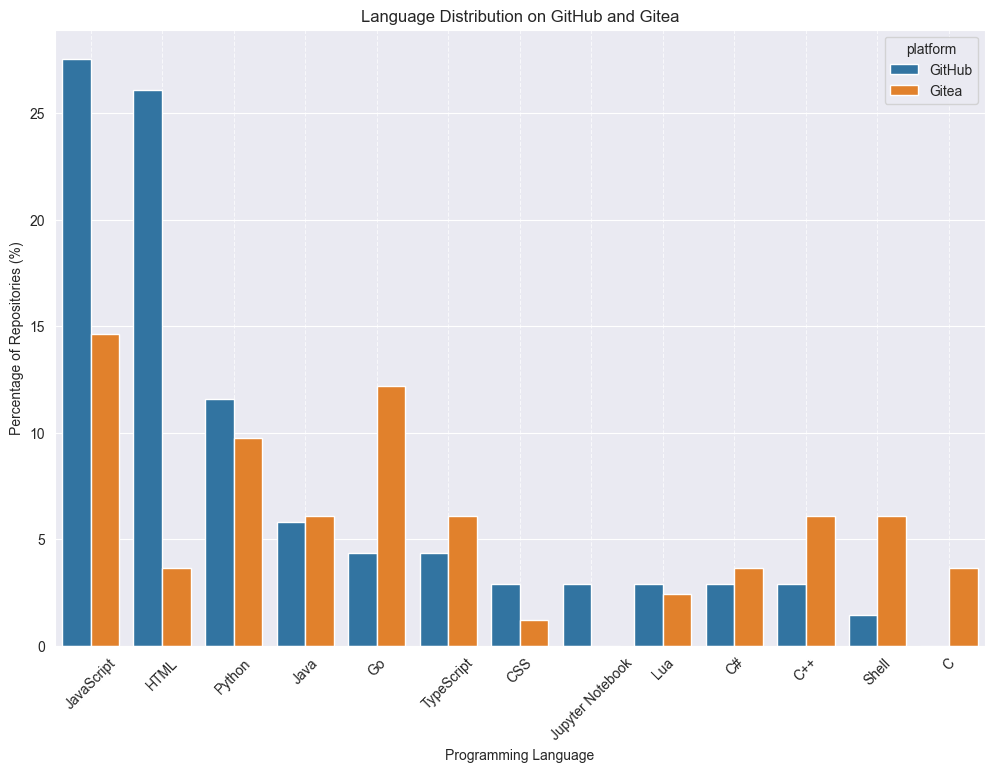

In [2]:
# Load Data
df_github = pd.read_csv("github_repos_with_metrics_test.csv")
df_gitea = pd.read_csv("gitea_repos_with_metrics_test.csv")

# Create the plot
platform_analysis.plot_language_distribution(df_github, df_gitea)


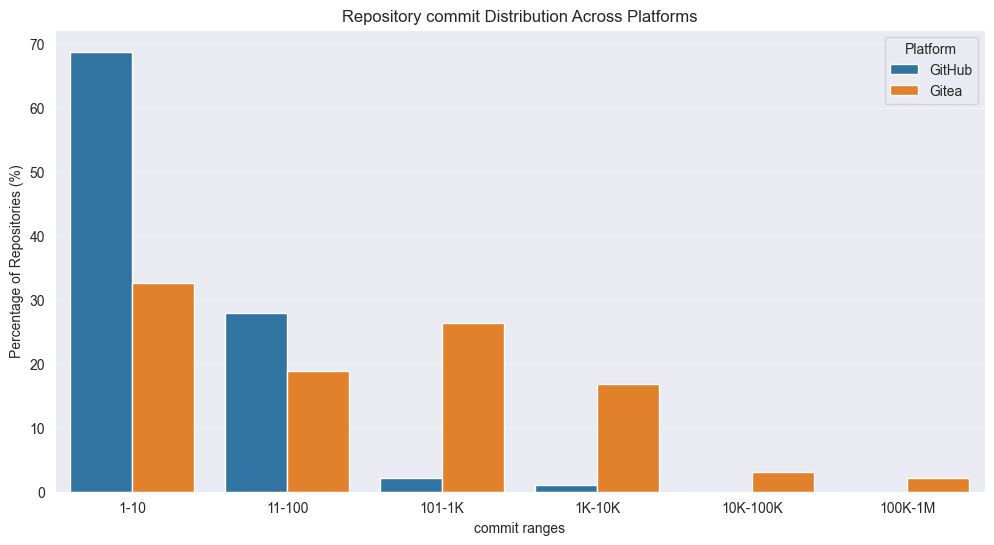

In [2]:
# Load Data
df_github = pd.read_csv("github_repos_with_metrics_test.csv")
df_gitea = pd.read_csv("gitea_repos_with_metrics_test.csv")

# Create the plot
platform_analysis.plot_distribution(df_github, df_gitea, Metrics.COMMIT)


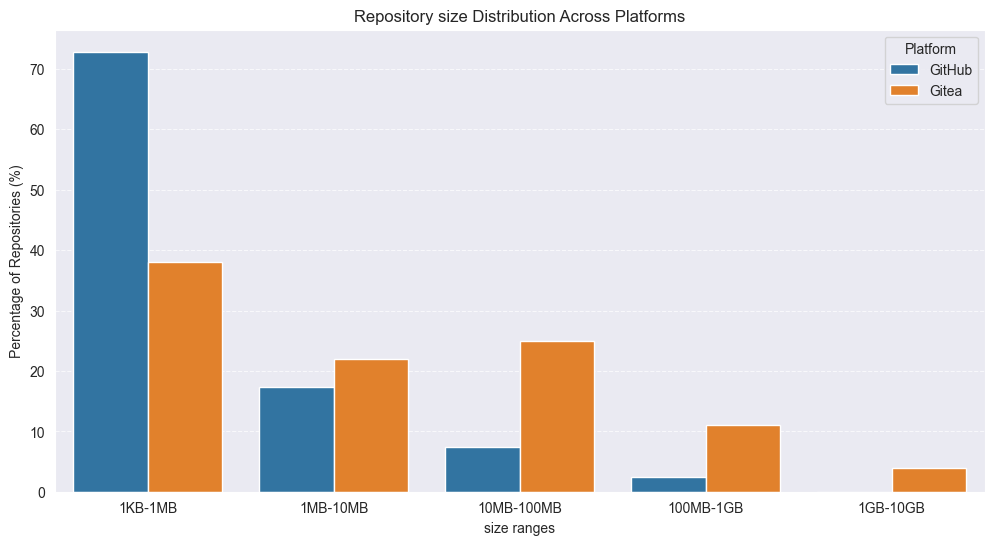

In [3]:
# Load Data
df_github = pd.read_csv("github_repos_with_metrics_test.csv")
df_gitea = pd.read_csv("gitea_repos_with_metrics_test.csv")

# Create the plot
platform_analysis.plot_distribution(df_github, df_gitea, Metrics.SIZE)

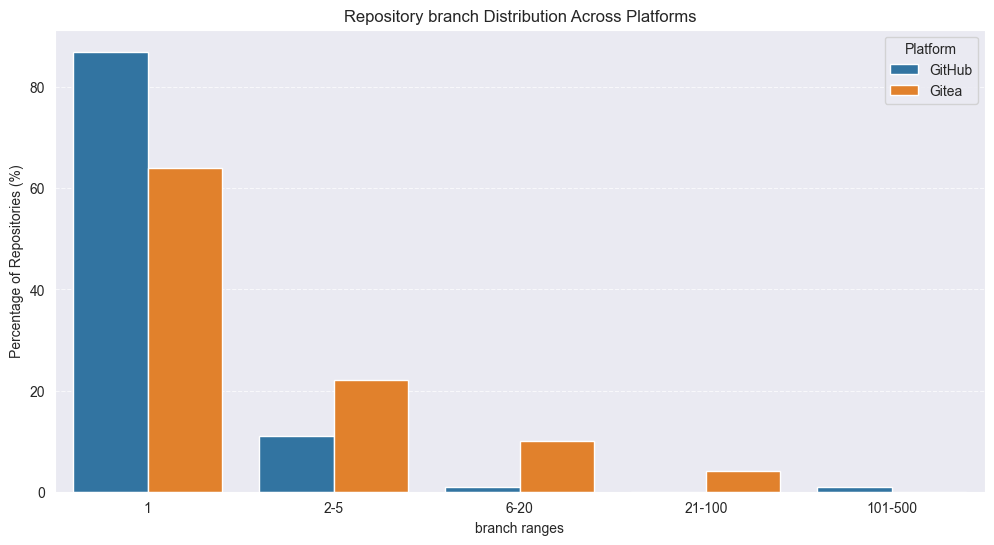

In [4]:
# Load Data
df_github = pd.read_csv("github_repos_with_metrics_test.csv")
df_gitea = pd.read_csv("gitea_repos_with_metrics_test.csv")

# Create the plot
platform_analysis.plot_distribution(df_github, df_gitea, Metrics.BRANCH)

Number of valid matches: 61


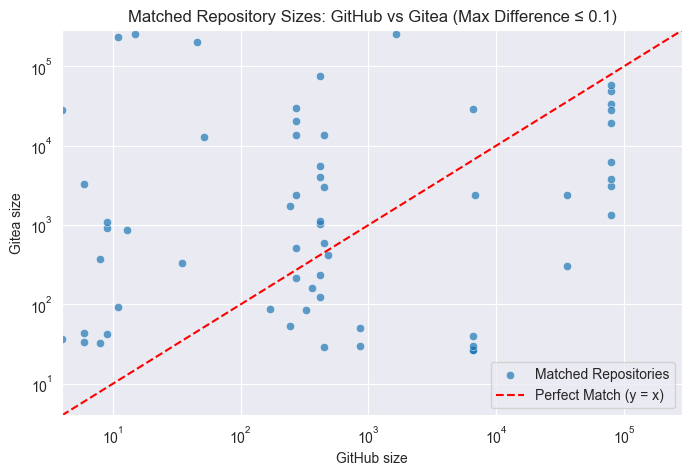

In [5]:
# Load Data
df_github = pd.read_csv("github_repos_with_metrics_test.csv")
df_gitea = pd.read_csv("gitea_repos_with_metrics_test.csv")

# Perform matching and create the plot
platform_analysis.propensity_score_matching(df_github, df_gitea, Metrics.SIZE, max_difference=0.1)

Number of valid matches: 70


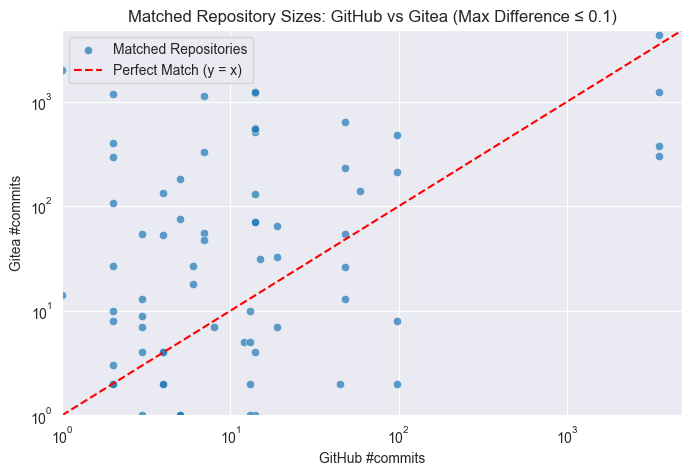

In [6]:
# Load Data
df_github = pd.read_csv("github_repos_with_metrics_test.csv")
df_gitea = pd.read_csv("gitea_repos_with_metrics_test.csv")

# Perform matching and create the plot
platform_analysis.propensity_score_matching(df_github, df_gitea, Metrics.COMMIT, max_difference=0.1)

Number of valid matches: 70


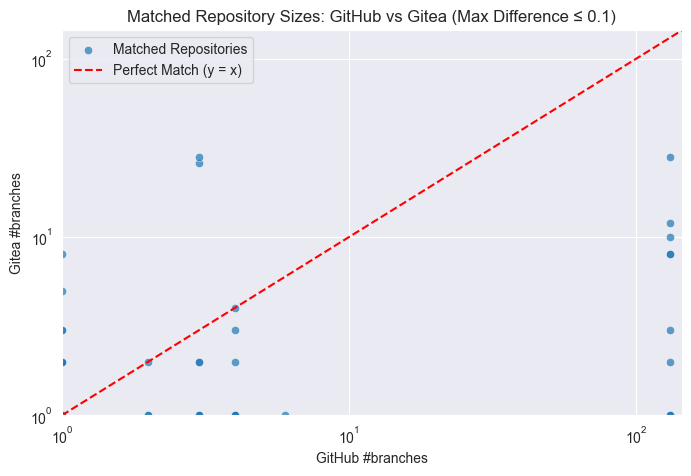

In [7]:
# Load Data
df_github = pd.read_csv("github_repos_with_metrics_test.csv")
df_gitea = pd.read_csv("gitea_repos_with_metrics_test.csv")

# Perform matching and create the plot
platform_analysis.propensity_score_matching(df_github, df_gitea, Metrics.BRANCH, max_difference=0.1)